# ML pipeline 
## Assignment 3
J. Adrián Sánchez

### 1. Fix and improve the pipeline code you submitted for the last assignment based on the feedback from the TAs. 
    - I added optional params to feed into pd.read_csv
    - I added a couple of exploration and transformation functions
    - I added more detailed explainations about functions

In [1]:
%run functions.py
%matplotlib inline

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
path= '/Users/schzcas/Documents/github/machine-learning-public-policy/assignments/assignment3/credit-data.csv'

## Load Data

In [3]:
df = read_csv(path, usecols=None, index_col=None)

** credit-data.csv ** has been loaded succesfully into pandas!
_____________________________

# of Rows: 150000
# of Columns: 13
_____________________________


In [4]:
df.head(2)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0


## Pre-Process Data

- In this part, I input the values of the columns that have NaNs.
- I also converted the column values types according to the features. 

In [5]:
finding_na(df)

19.8% NaN values from the colum: MonthlyIncome
2.6% NaN values from the colum: NumberOfDependents


In [6]:
#Replace NaN with mean and converting to Integer
df = nan_mean_int(df, "NumberOfDependents")
#Replace NaN with mean 
df = nan_mean(df,'MonthlyIncome')
#Set PersonId column as Index
df = indexize(df,'PersonID')
#Create categories of zipcode
df = categorize(df, 'zipcode')
#Create categories of outcome data
df = categorize(df, 'SeriousDlqin2yrs' )

Index(['zipcode'], dtype='object')
Index(['SeriousDlqin2yrs', 'zipcode'], dtype='object')


## Explore Data

- We can see that our data have the same number of calues, and the types of columns are ready

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 12 columns):
SeriousDlqin2yrs                        150000 non-null category
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
zipcode                                 150000 non-null category
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null int64
dtypes: category(2), float64(3), int64(7)
memory usage: 12.9 MB


- We can see that two features in the following plot have a high correlation. This might be a problem for our models.  This features are the ones that relate to the number of days that are late in the last 60-90 days. 

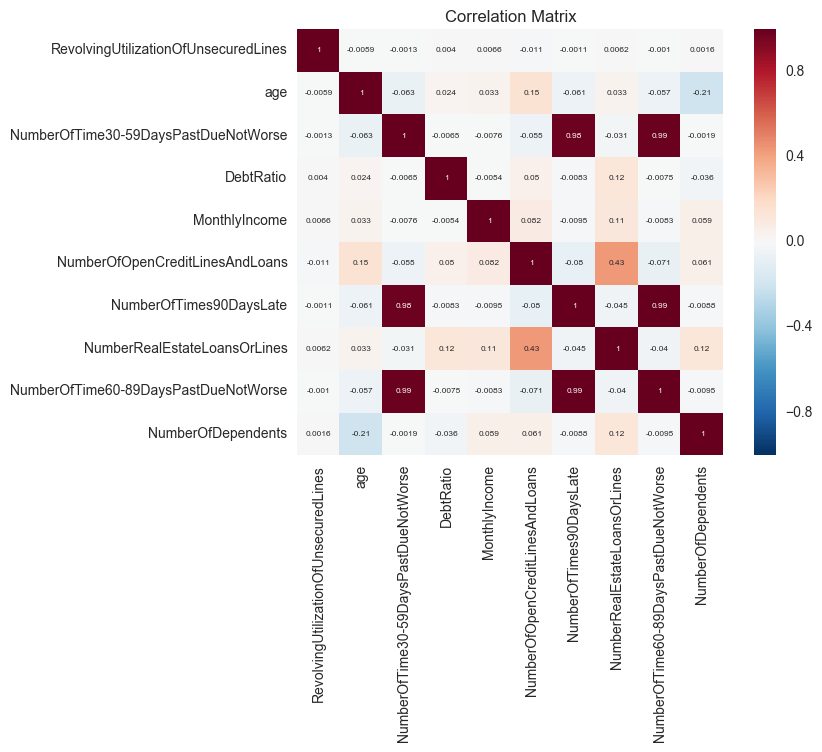

In [39]:
plot_corr_matrix(df)

## Generate Features/Predictors

- In this part, I will prepare the set of x features and our vector of Y labaled outcomes for our classifier. 

In [10]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

## Build Classifier

- There is a clasifier that gives you back a list of classifiers and a grid of different parameters for each one. We would like to have a set of different parameters in which we would like to run our models. 

- We can see more information with the documentation of the function:

In [11]:
?define_clfs_params()

- We are going to take the small set of parameters from this function. this will give me back different classifiers with different set of features. 

In [12]:
clfs, grid= define_clfs_params('small')

### Definition of models to run

- We are going to define a set of models to run and we are going to run a loop that evaluates all models with the different set of parameters. 
- Bellow are the models and the parameters that each model are assigned to evaluate

In [13]:
models_to_run = ['RF', 'LR', 'SVM', 'KNN']
for model, param in grid.items():
    if model in models_to_run:
        print(model, param)

RF {'min_samples_split': [2, 10], 'max_features': ['sqrt', 'log2'], 'n_estimators': [10, 50], 'max_depth': [5, 20]}
KNN {'weights': ['uniform', 'distance'], 'n_neighbors': [10, 50]}
SVM {'C': [0.01, 0.1], 'penalty': ['l1', 'l2']}
LR {'C': [0.1, 1], 'penalty': ['l1', 'l2']}


- We can see that we are going to run 28 different models. 
- At the end I added the time elapsed of trainning and fitting the 28 models with an out-sample of .25 for testing. 
- At the end of each model, a ROC curve and a precision-call plots are going to be printed with metrics and the time it was needed to fit and train for comparision. 
- The output of this funciton is a table that I will export to a pickle format for optimizing the data in a file. 

## Rayid's Magic Loop

Time to complete fit and prediction was  0.5587618350982666


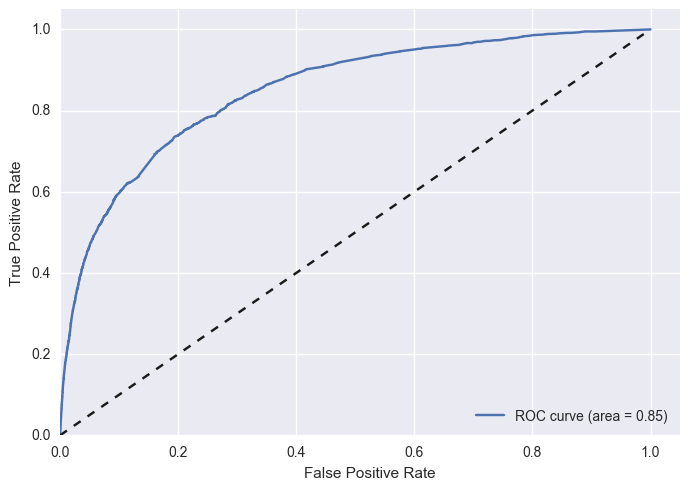

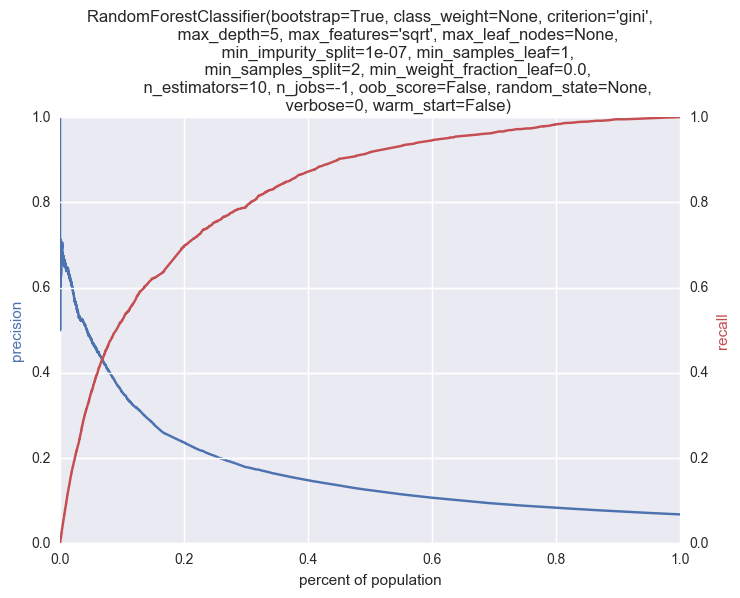

Time to complete fit and prediction was  1.0030031204223633


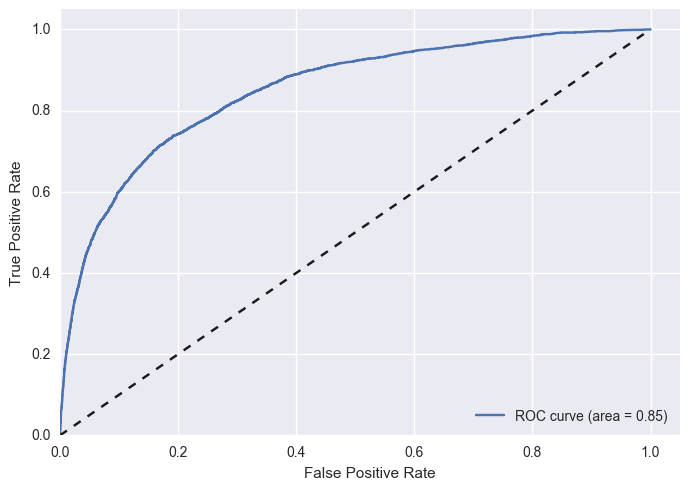

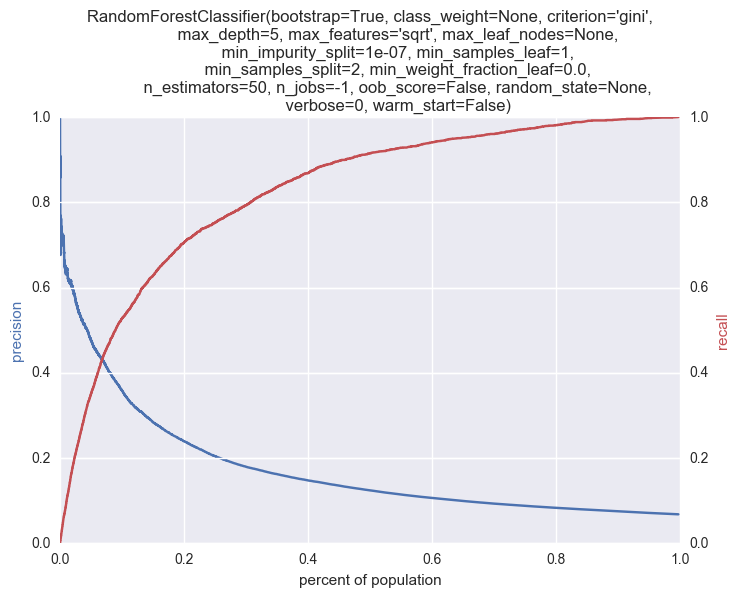

Time to complete fit and prediction was  0.44658493995666504


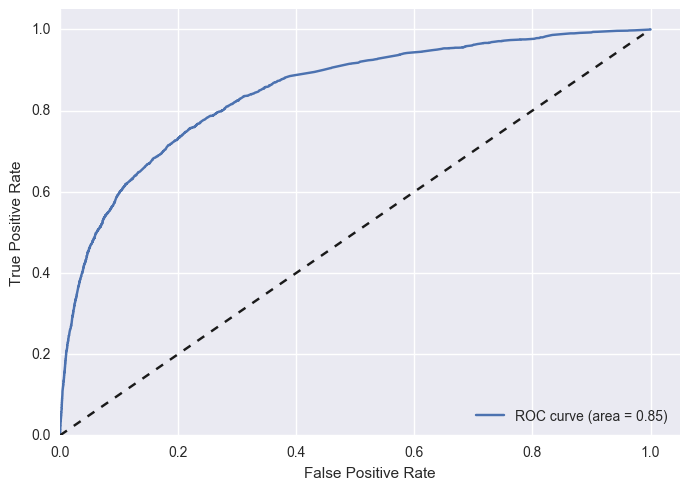

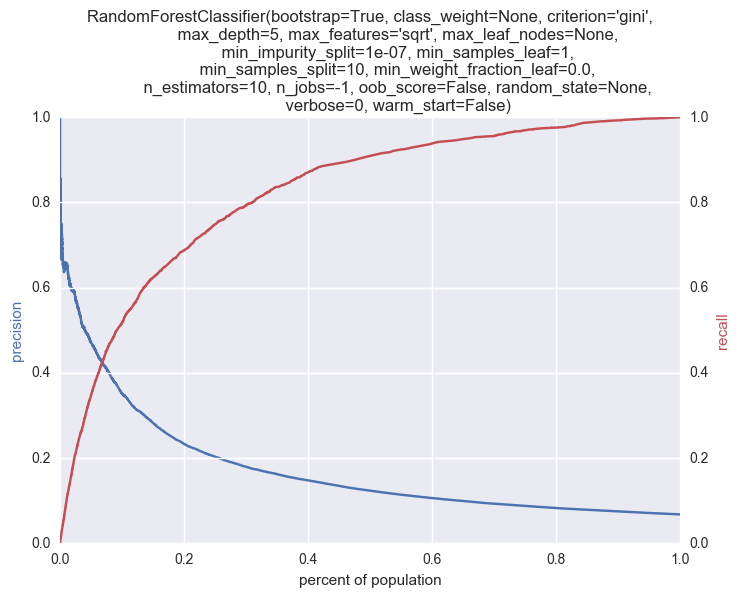

Time to complete fit and prediction was  1.097851037979126


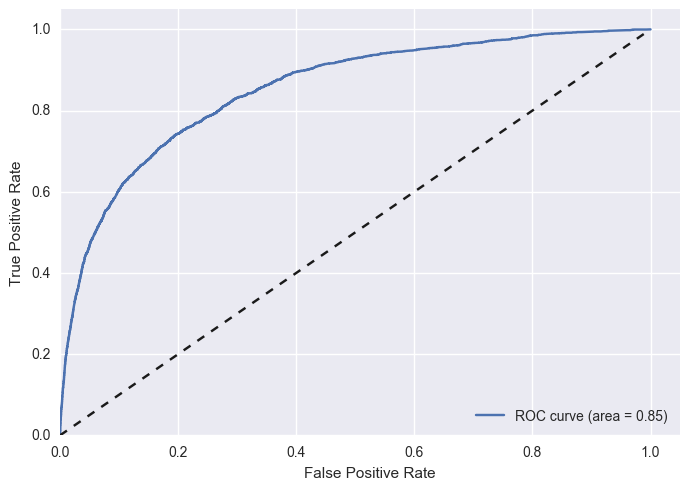

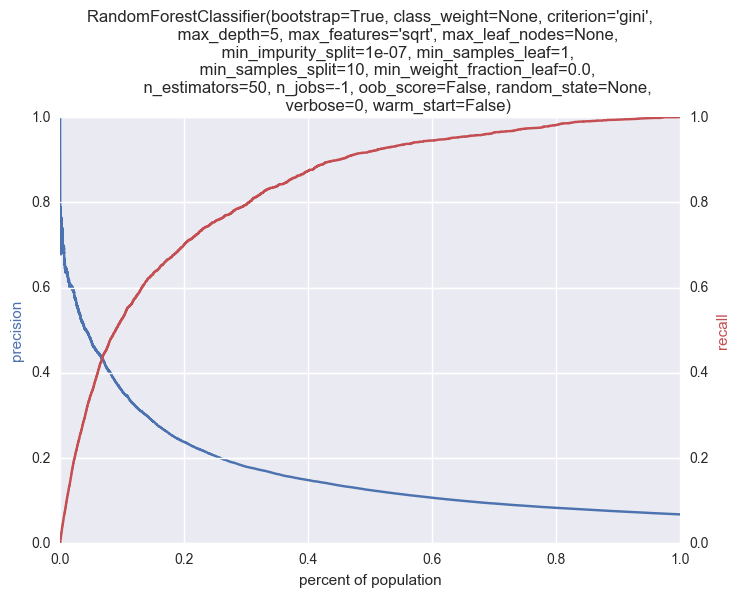

Time to complete fit and prediction was  0.45693302154541016


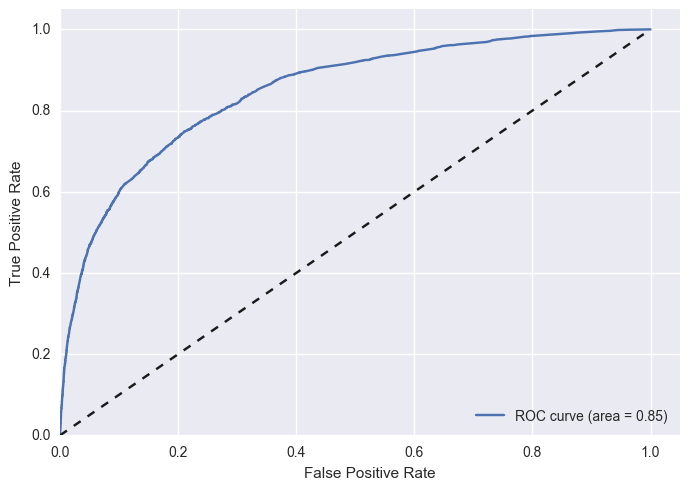

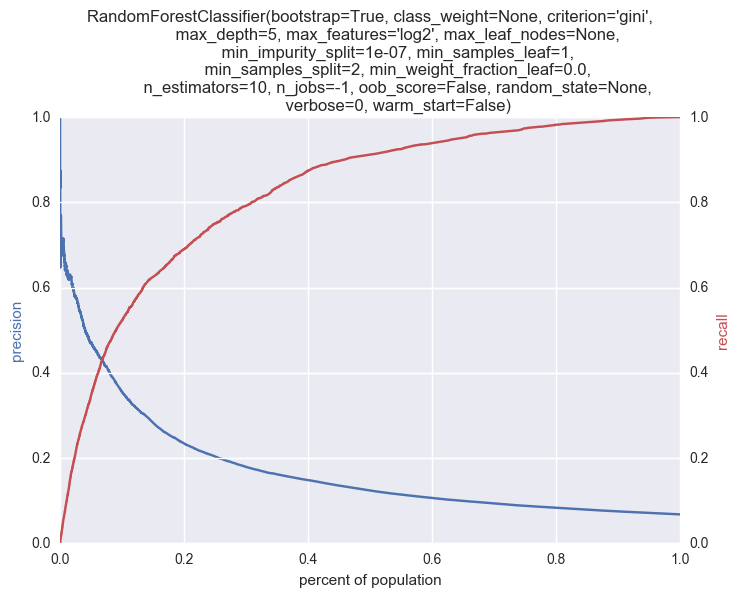

Time to complete fit and prediction was  0.9964020252227783


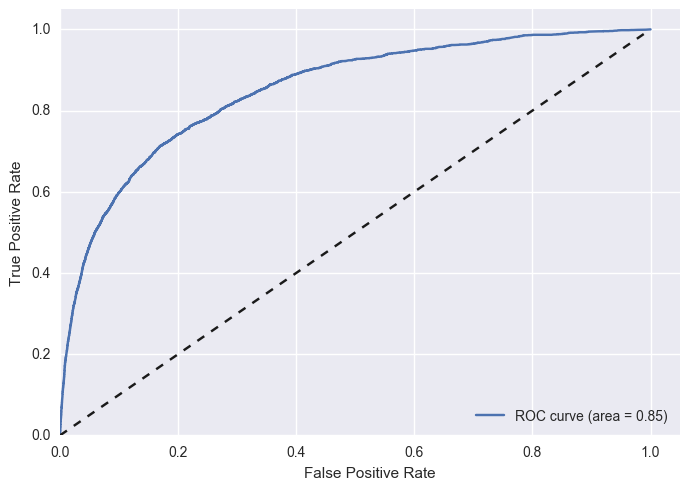

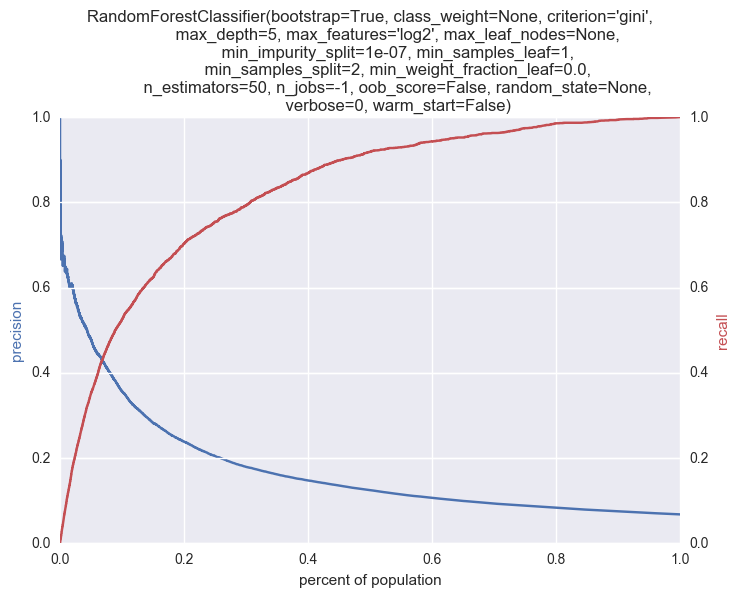

Time to complete fit and prediction was  0.43633294105529785


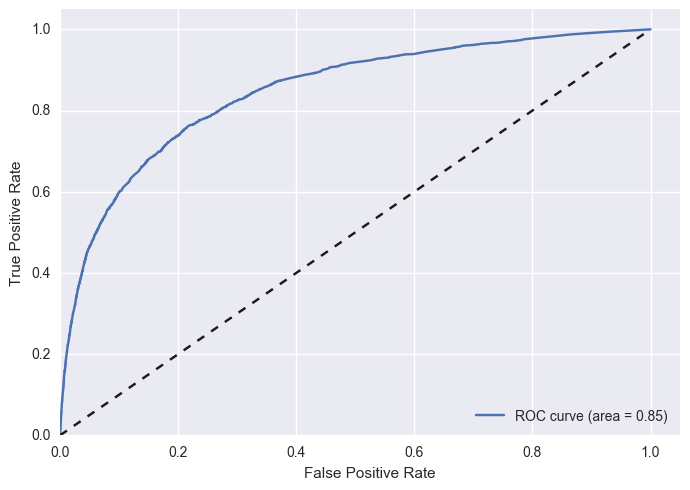

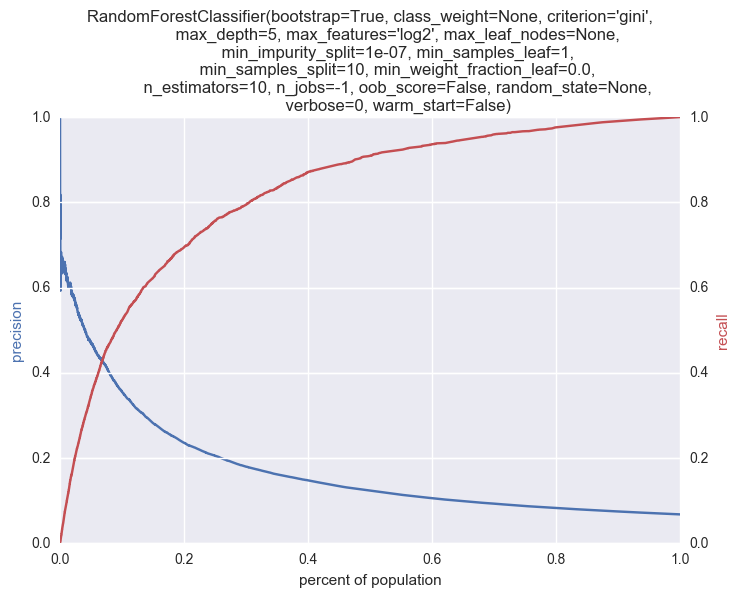

Time to complete fit and prediction was  0.999025821685791


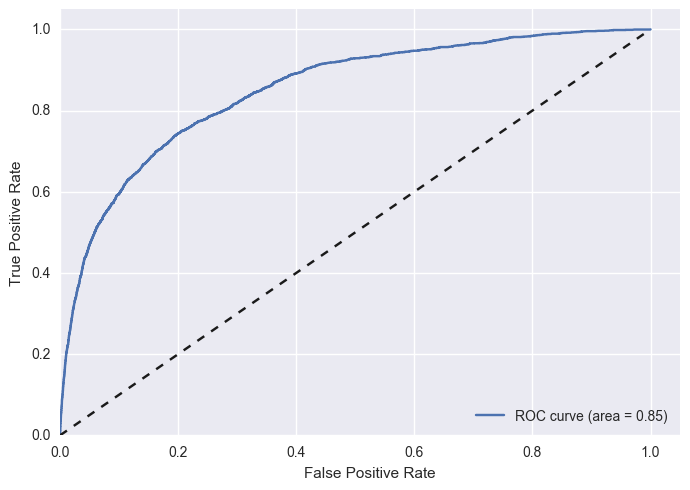

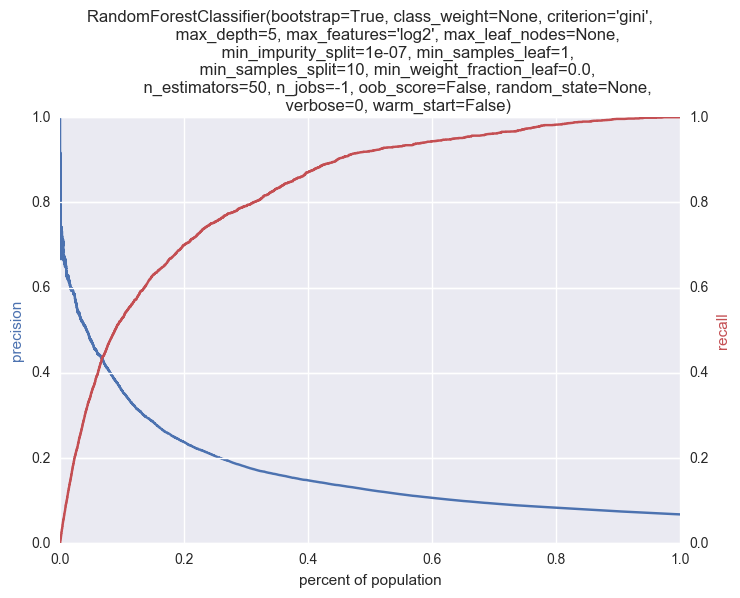

Time to complete fit and prediction was  0.7476451396942139


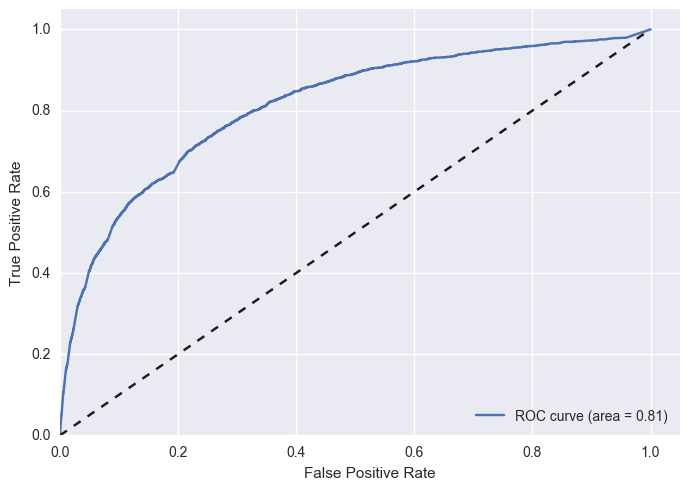

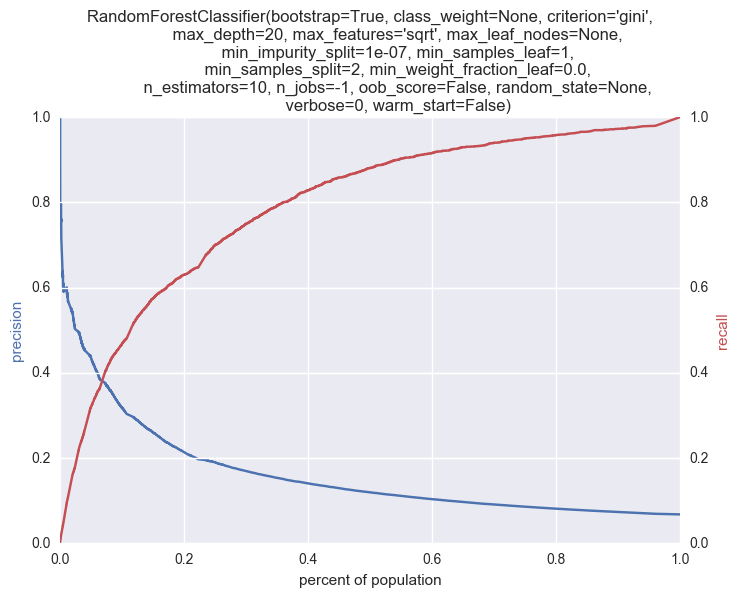

Time to complete fit and prediction was  2.1234350204467773


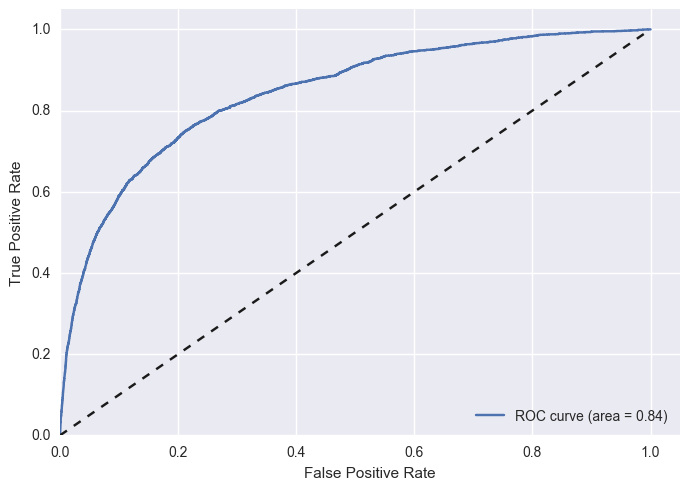

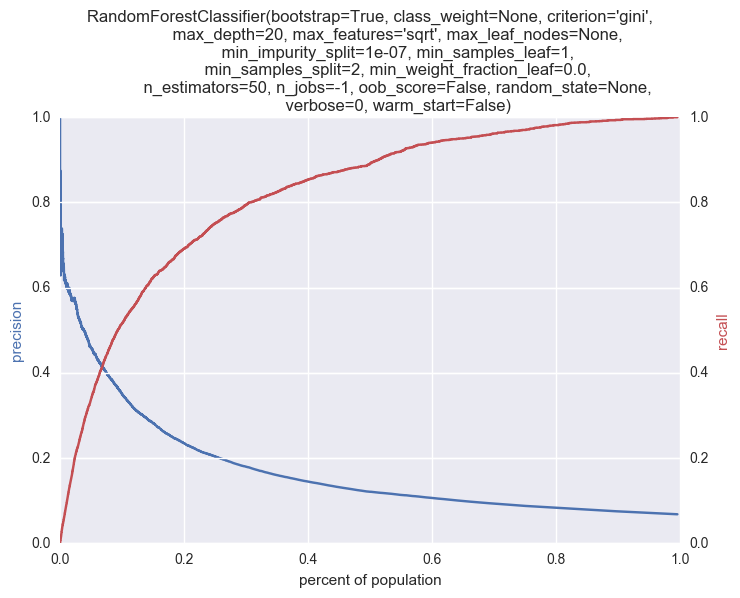

Time to complete fit and prediction was  0.7638518810272217


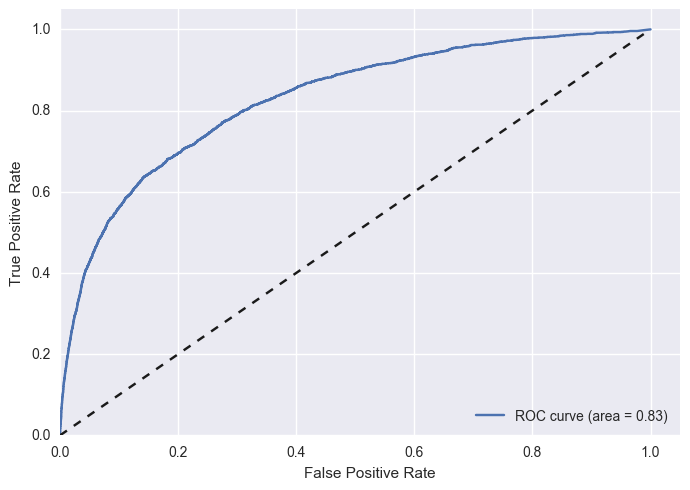

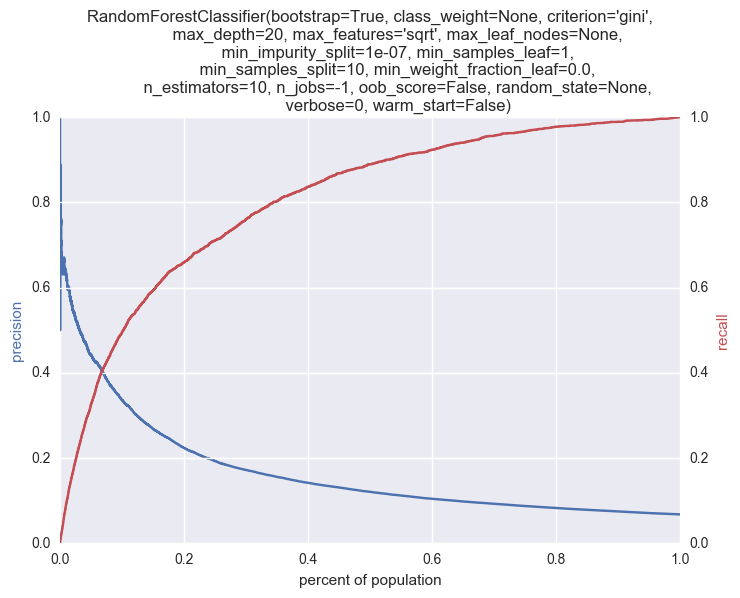

Time to complete fit and prediction was  2.130457878112793


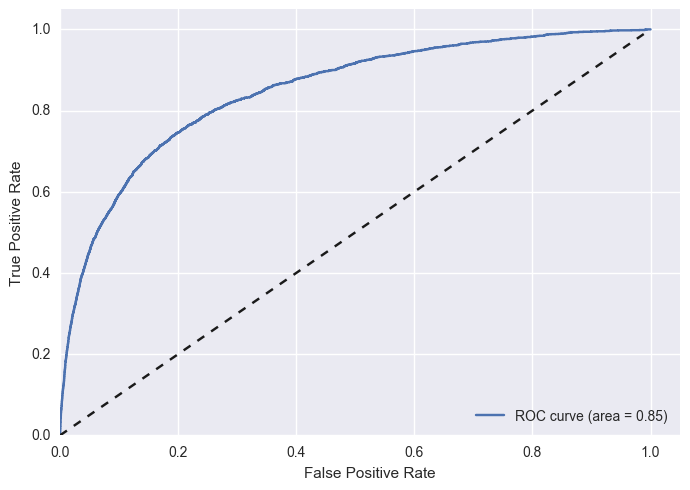

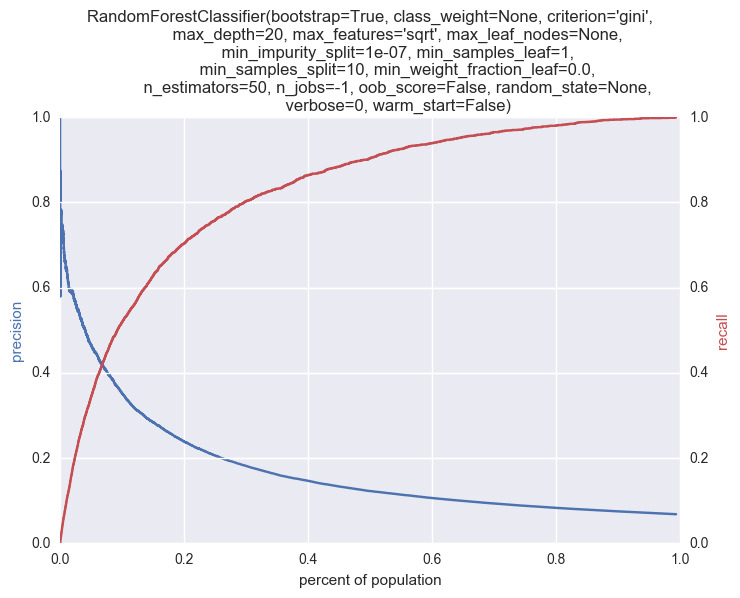

Time to complete fit and prediction was  0.7611229419708252


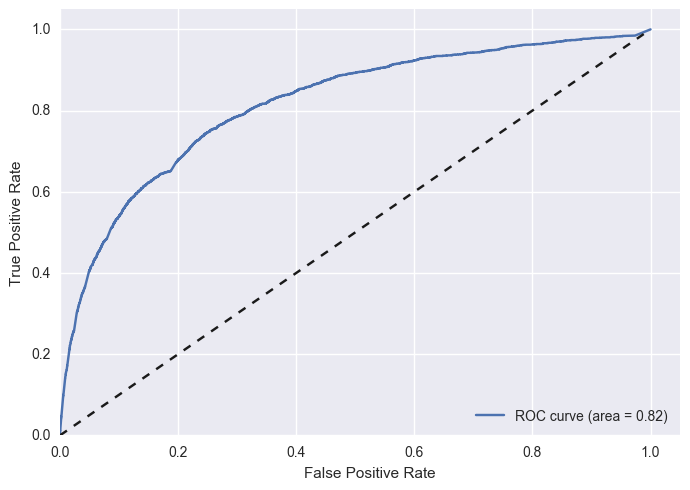

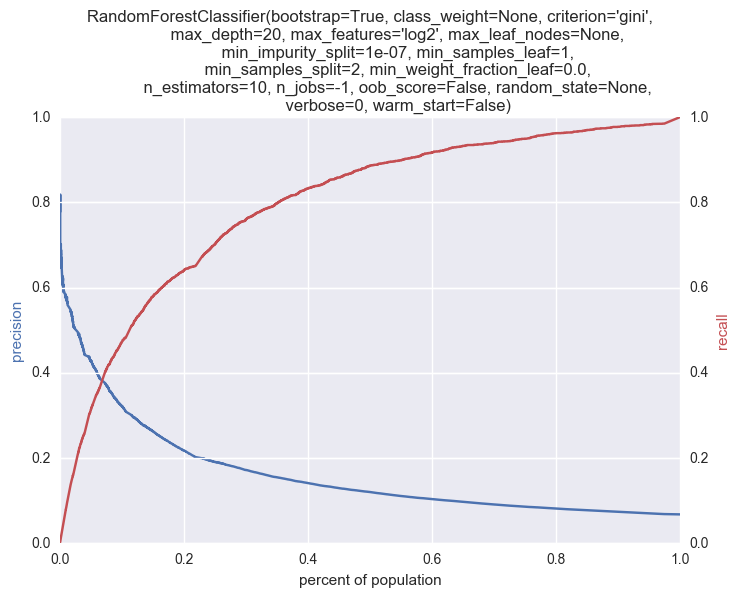

Time to complete fit and prediction was  2.1290230751037598


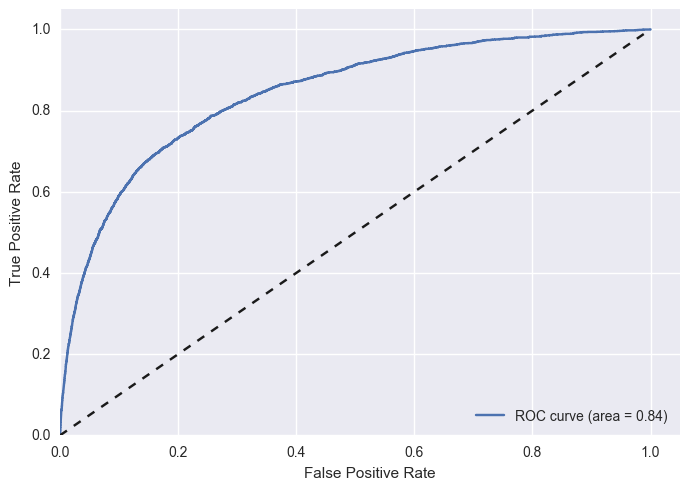

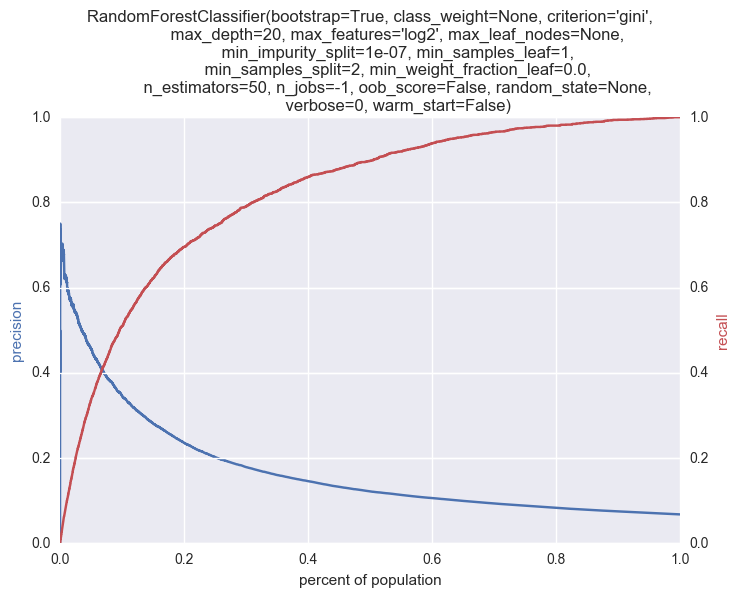

Time to complete fit and prediction was  0.757594108581543


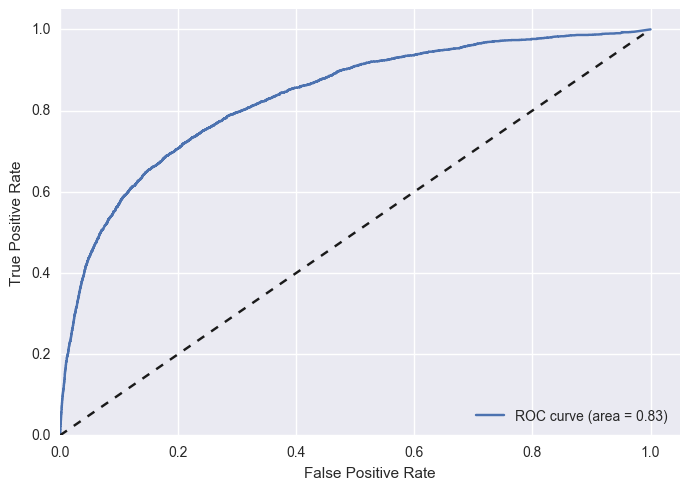

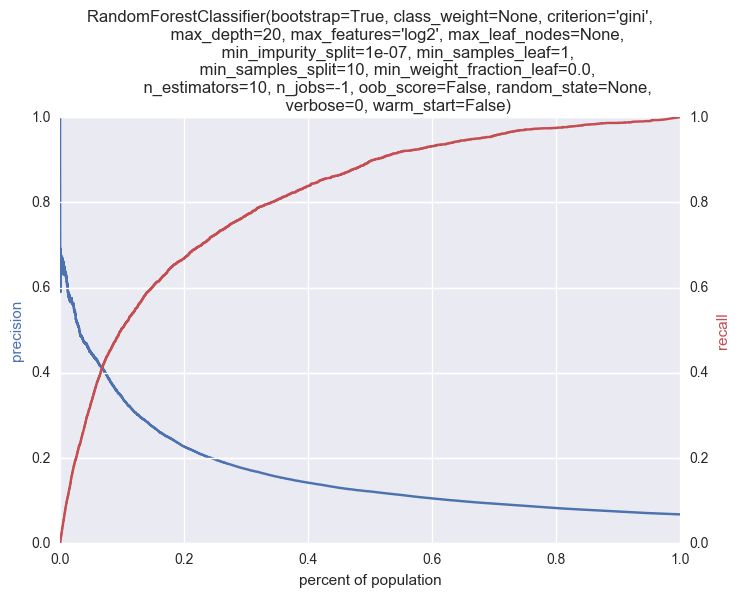

Time to complete fit and prediction was  2.131762981414795


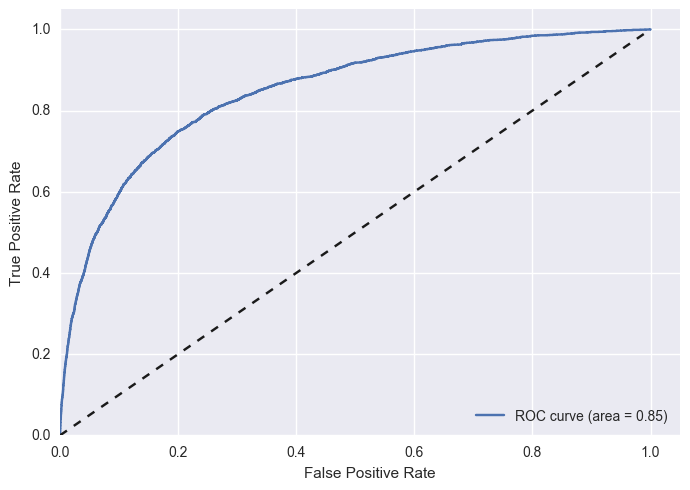

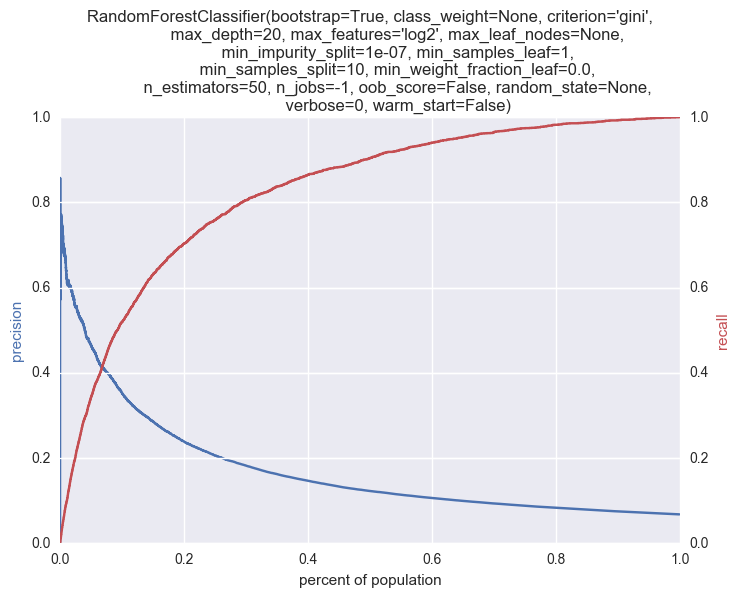

Time to complete fit and prediction was  3.7053840160369873


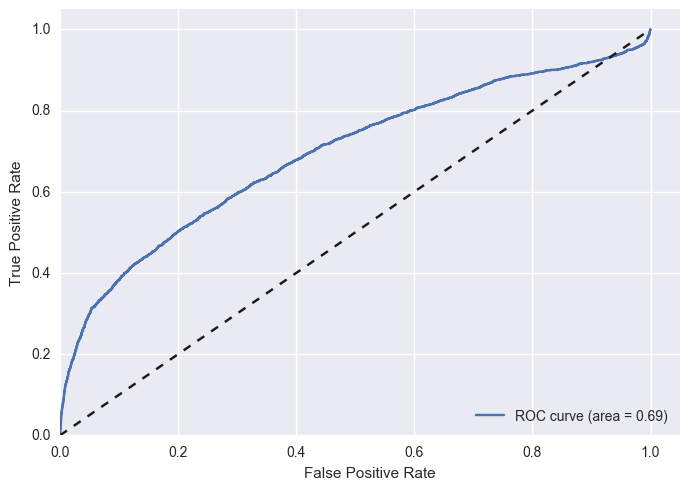

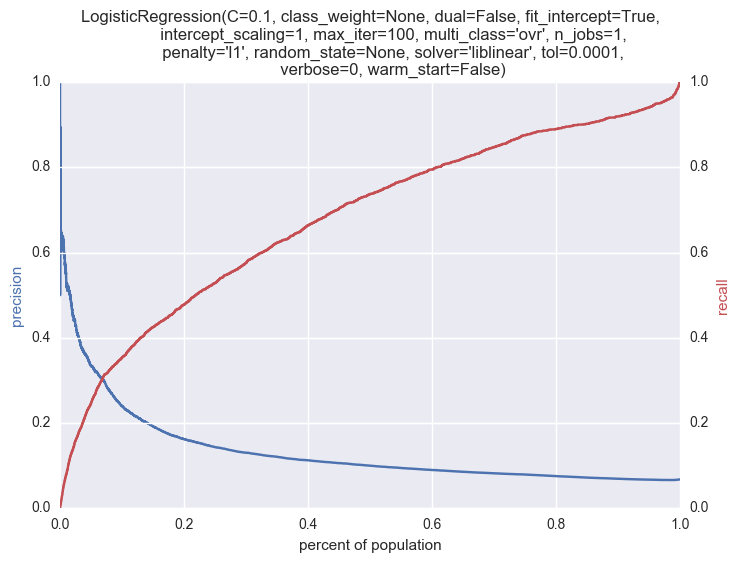

Time to complete fit and prediction was  1.0599770545959473


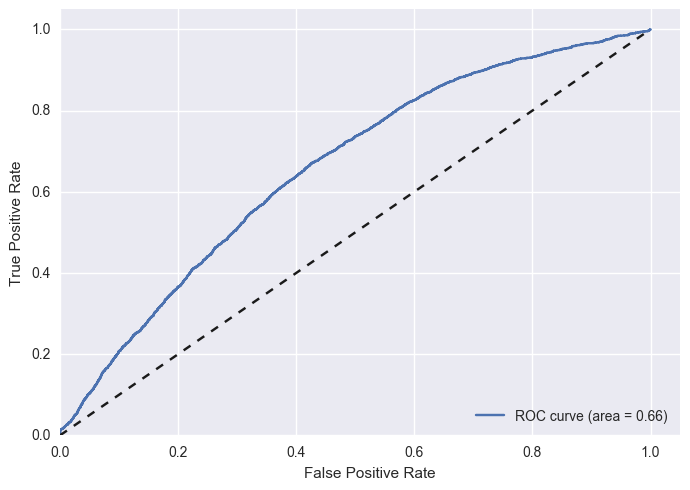

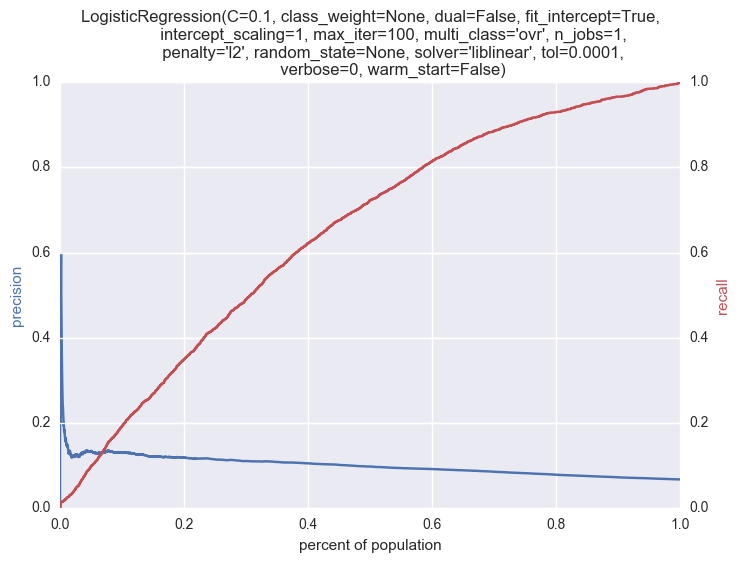

Time to complete fit and prediction was  1.8844449520111084


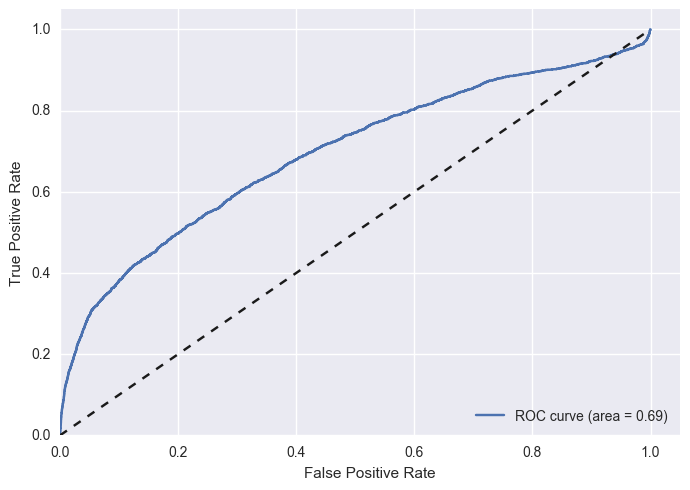

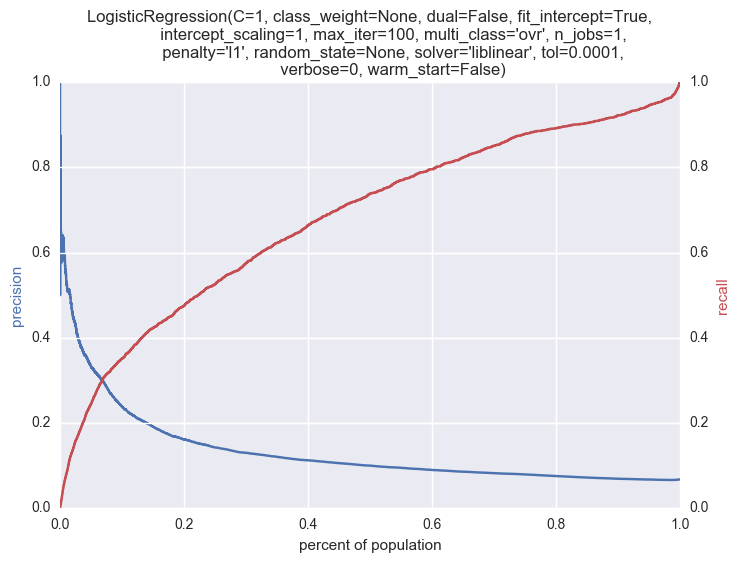

Time to complete fit and prediction was  0.9641938209533691


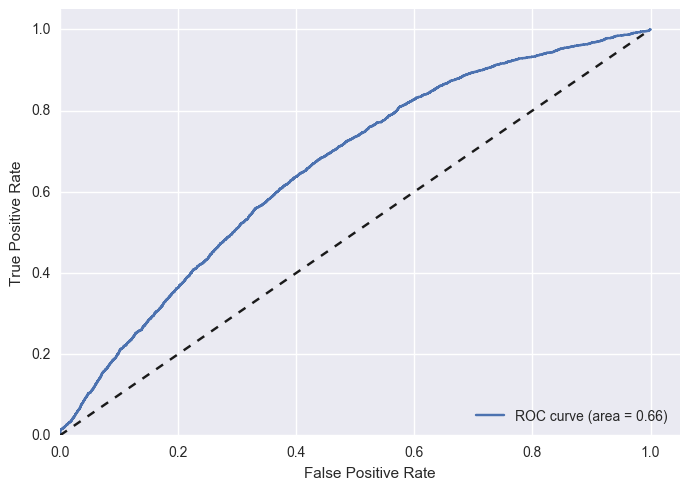

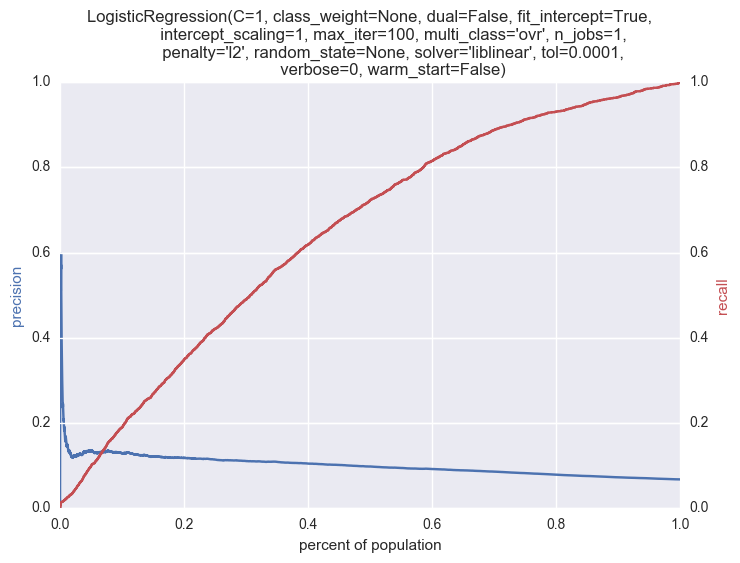

Time to complete fit and prediction was  3.2706780433654785


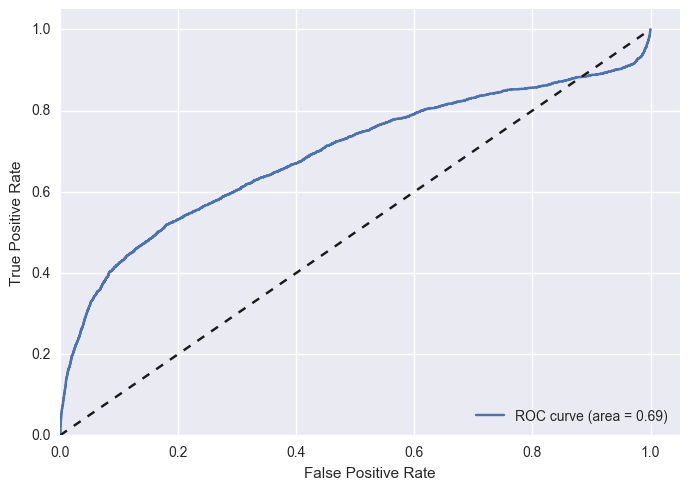

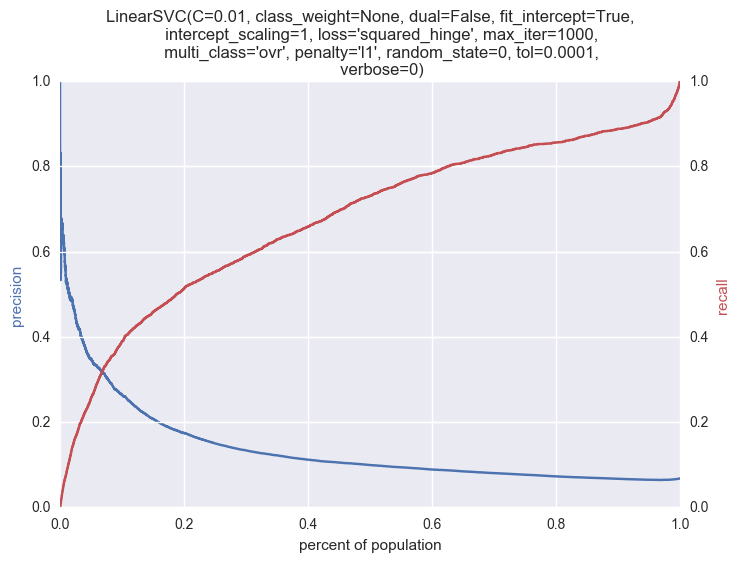

Time to complete fit and prediction was  0.6653940677642822


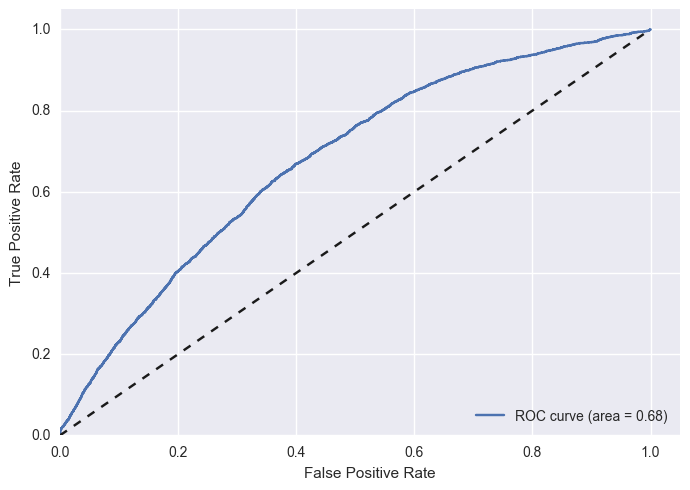

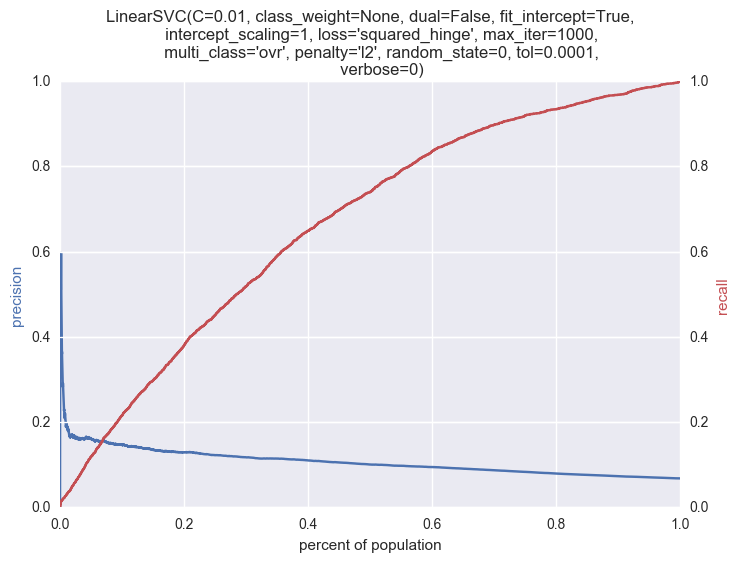

Time to complete fit and prediction was  3.2057199478149414


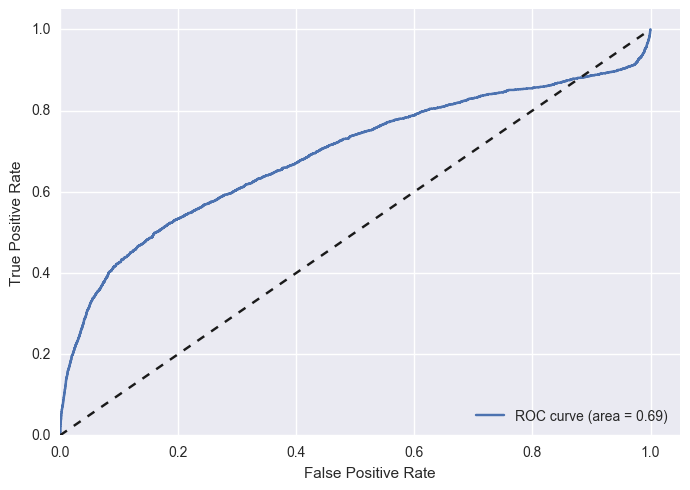

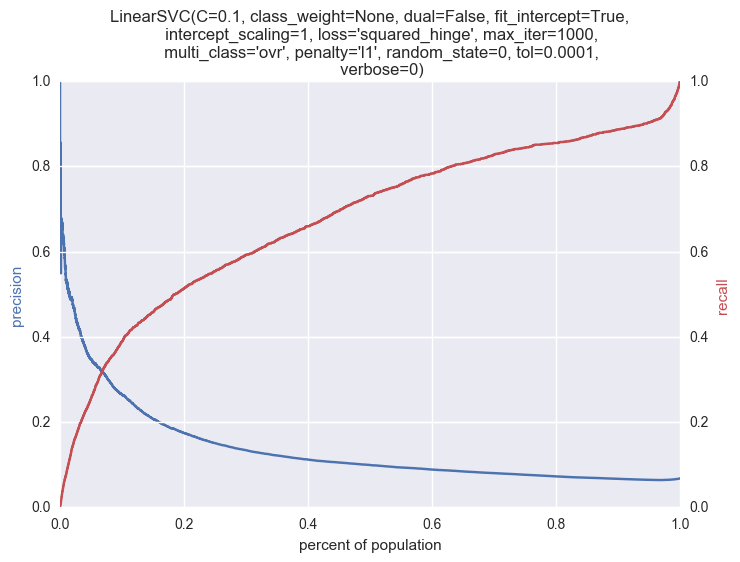

Time to complete fit and prediction was  0.6164600849151611


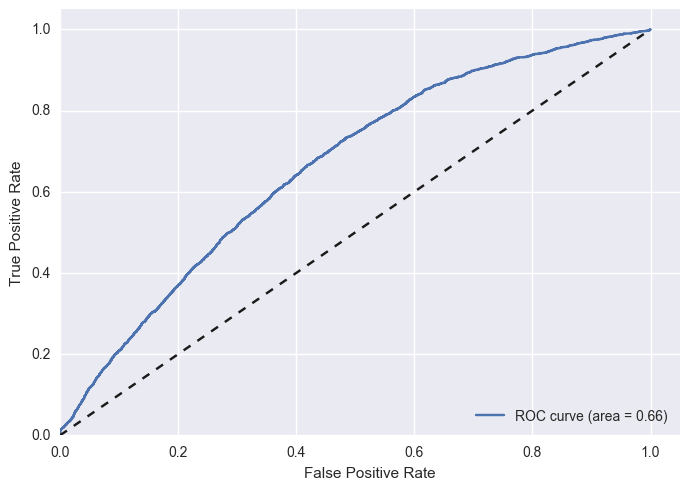

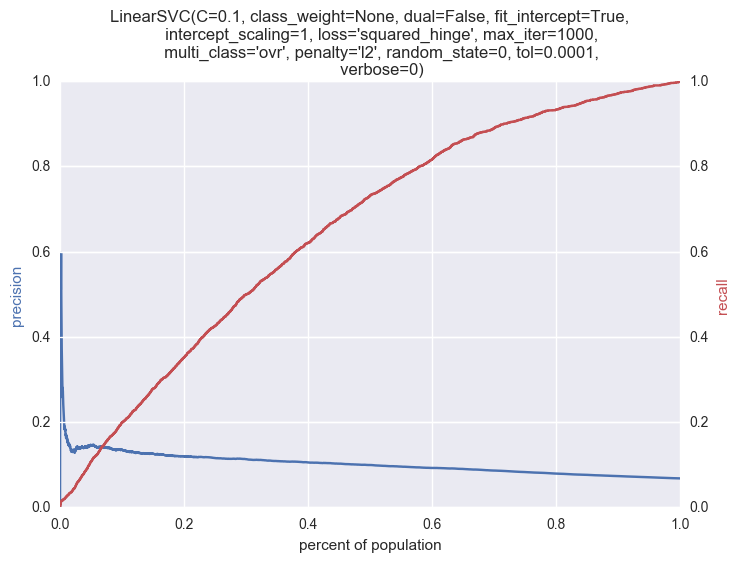

Time to complete fit and prediction was  3.4244751930236816


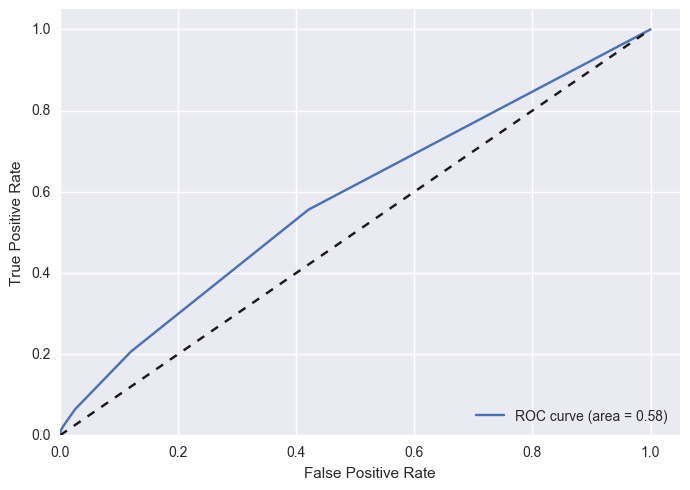

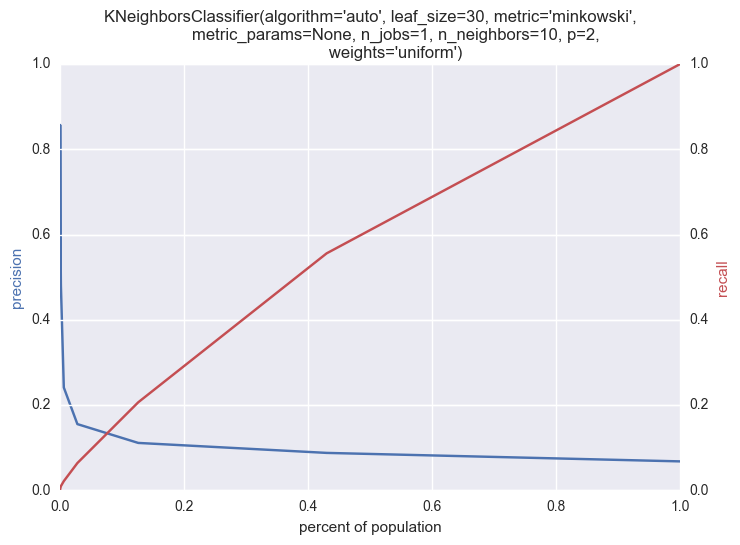

Time to complete fit and prediction was  3.442699909210205


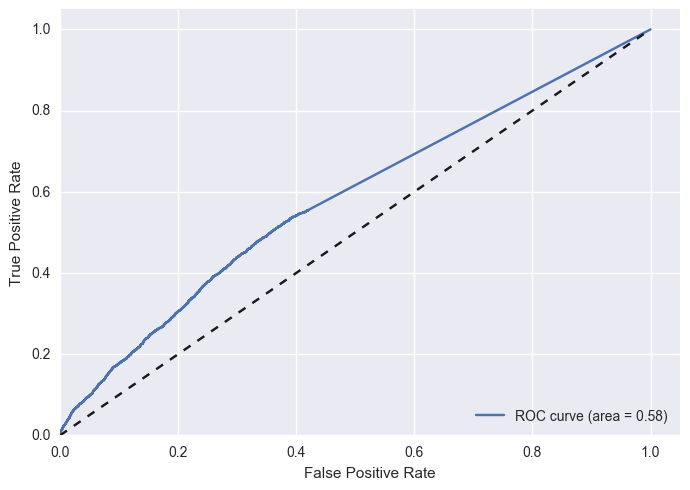

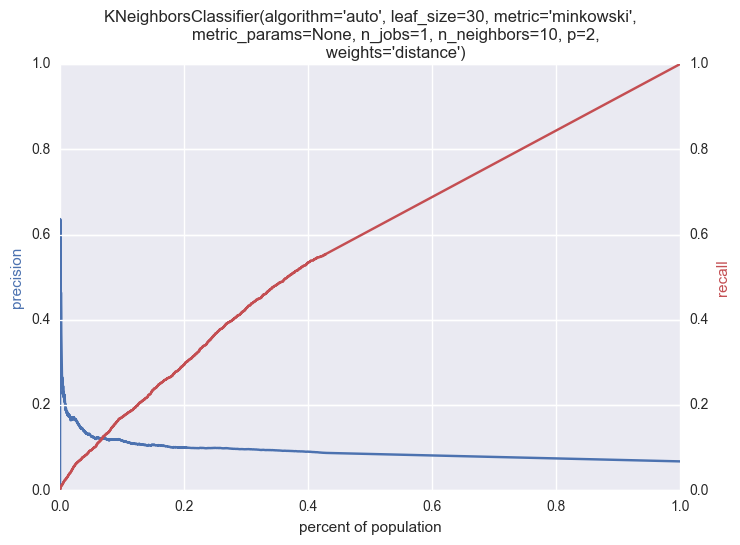

Time to complete fit and prediction was  4.411082983016968


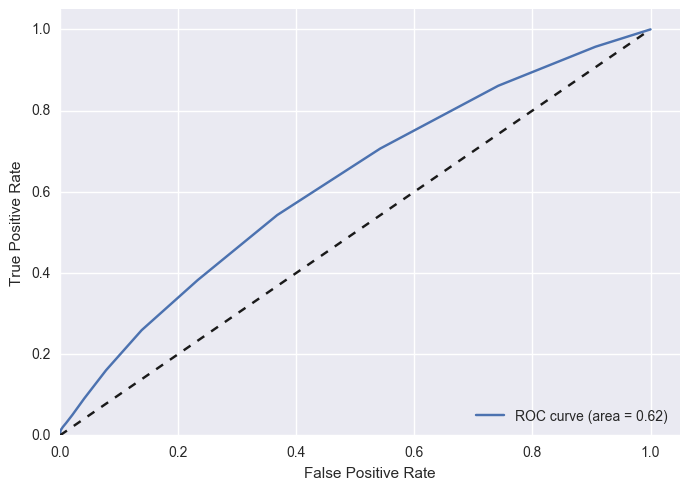

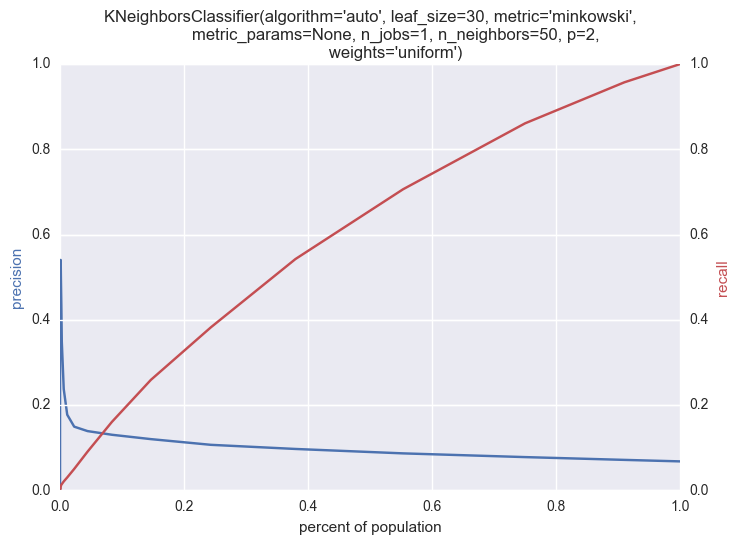

Time to complete fit and prediction was  4.502993106842041


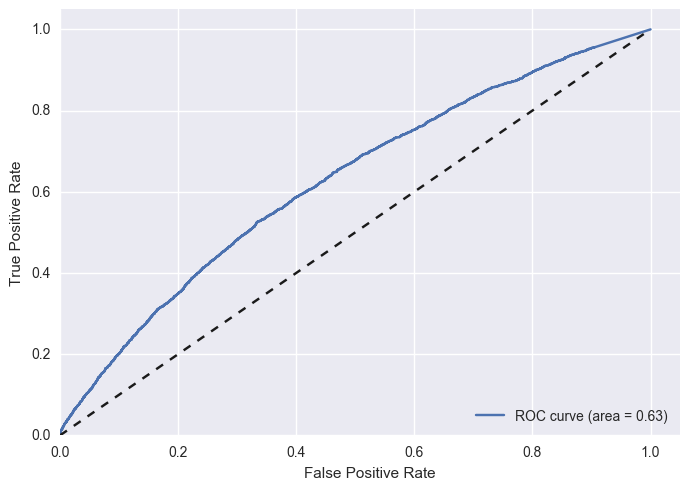

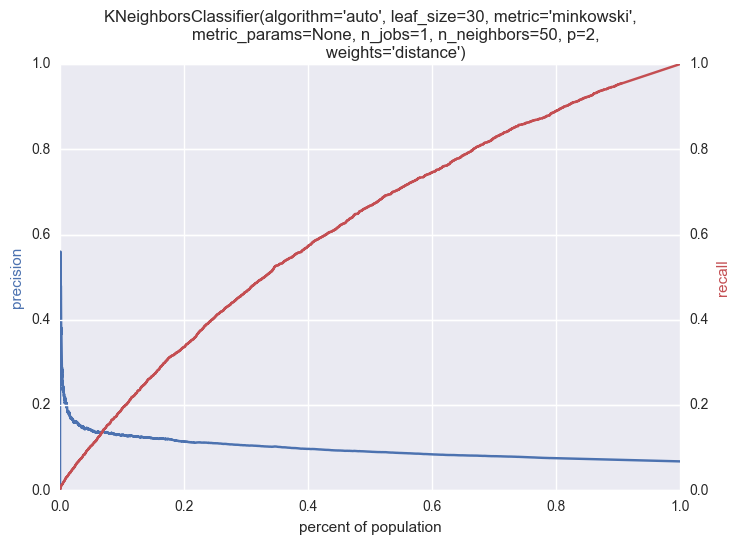

194.9904980659485


In [14]:
model_table = clf_loop(models_to_run, clfs, grid, X, y)

## Evaluating models

- Our running time of running the 28 models was about 3.23 mins. 
- With the output table we can explore which model fitted the most by maximizing the Area Under the curve of our models. 

In [15]:
model_table

,model_type,clf,parameters,auc-roc,p_at_5,p_at_10,p_at_20
0,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 2, 'max_features': 'sqrt...",0.850770,0.479467,0.355200,0.236933
1,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 2, 'max_features': 'sqrt...",0.850532,0.476267,0.358400,0.239600
2,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 10, 'max_features': 'sqr...",0.846314,0.470933,0.351200,0.233200
3,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 10, 'max_features': 'sqr...",0.852465,0.474667,0.357867,0.238000
4,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 2, 'max_features': 'log2...",0.849085,0.471467,0.355733,0.234267
5,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 2, 'max_features': 'log2...",0.850747,0.478400,0.357067,0.238800
6,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 10, 'max_features': 'log...",0.846811,0.471467,0.355733,0.236267
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 10, 'max_features': 'log...",0.850925,0.476267,0.358400,0.237600
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 2, 'max_features': 'sqrt...",0.813008,0.435200,0.317867,0.214000
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 2, 'max_features': 'sqrt...",0.843038,0.459200,0.349867,0.234667


## Saving the table

In [16]:
model_table.to_pickle("df.pkl")

## Maximizing AUC

- As we can see in the following data, Random Forset was our best model. 
- Compared to the last assigment, that I ran a Logistic Regression and a Random forest with default values, Random Forest with a special tunning jumped from my .78 AUC to .852 AUC.  The max depth were just 5 pure level states, the minimum number of samples required to split an internal node where 10, with 50 trees. 

- In terms of speed, the K-NN model was the slowest one, this is because is need to calculate all the distances between the dimensions for each point for each set of neighbors, this is very high intensive computing. The second slowest was the SVM Logistic Regression, because also need to calculate a distance function between each point in the dataset. I used the linnear beause the non-linear are very time consuming to fit an hyperplane for each data point. 

In [32]:
model_table.ix[model_table['auc-roc'].idxmax()]

model_type                                                   RF
clf           (DecisionTreeClassifier(class_weight=None, cri...
parameters    {'min_samples_split': 10, 'max_features': 'sqr...
auc-roc                                                0.852465
p_at_5                                                 0.474667
p_at_10                                                0.357867
p_at_20                                                   0.238
Name: 3, dtype: object

In [38]:
model_table.ix[model_table['auc-roc'].idxmax(), 'parameters']

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 50}

**My recommendation** will be to run Random Forests. I also would recommend a second evaluation process to see for special parameters. I would also suggest a more robust data featuring process to eliminate redundant data and the creation of more features that could help the model fit better. 